In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

### EDA

In [69]:
data=pd.read_csv('data/diamonds.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [70]:
data.shape

(53940, 11)

In [71]:
data.size

593340

In [72]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [73]:
data.duplicated().sum()

0

In [74]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [75]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [76]:
categorical_columns = ["cut", "color", "clarity"]
data[categorical_columns] = data[categorical_columns].apply(LabelEncoder().fit_transform)

In [77]:
data.dtypes

carat      float64
cut          int32
color        int32
clarity      int32
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [78]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


### Outlier Detection

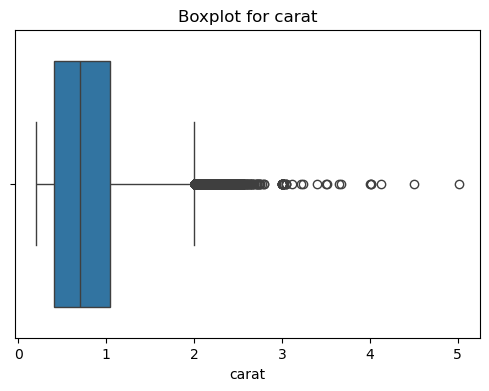

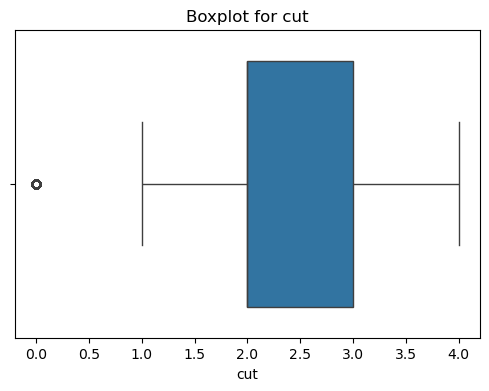

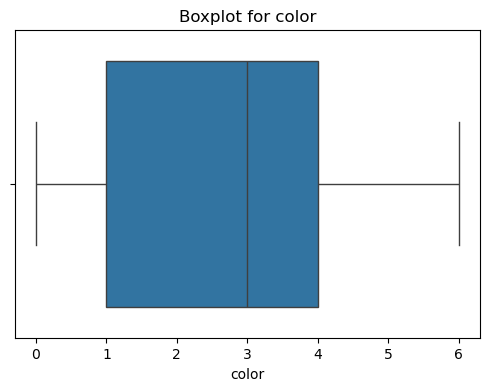

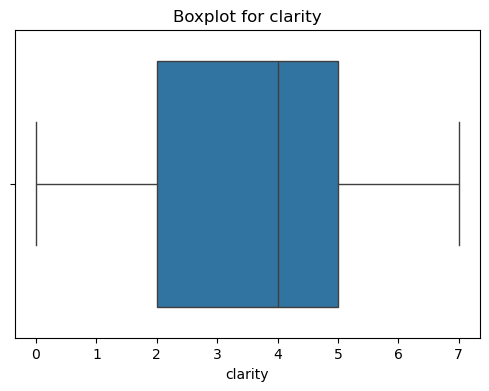

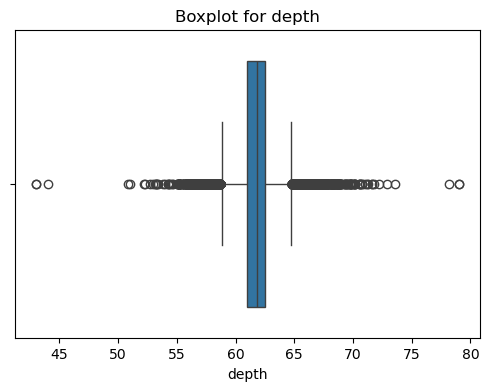

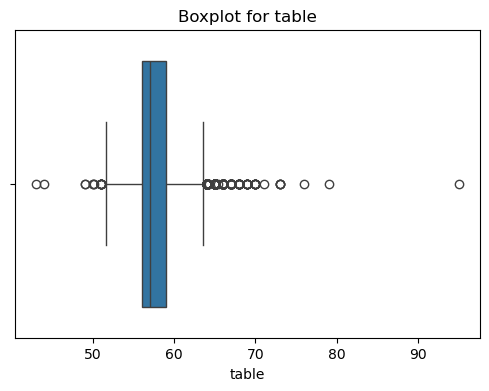

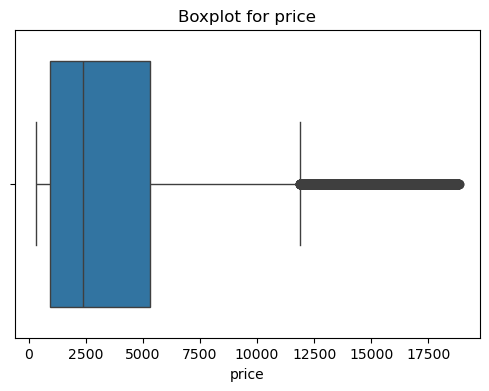

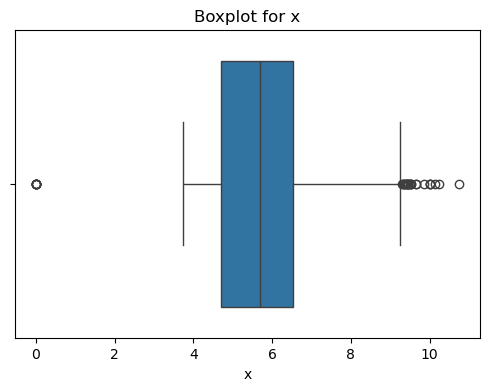

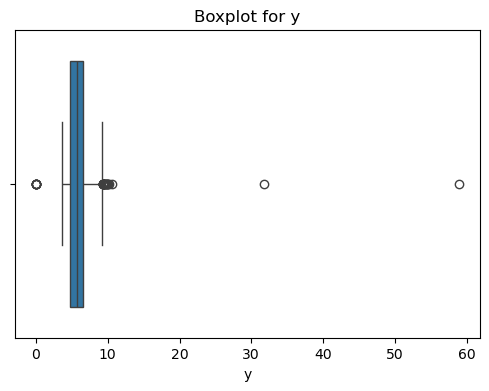

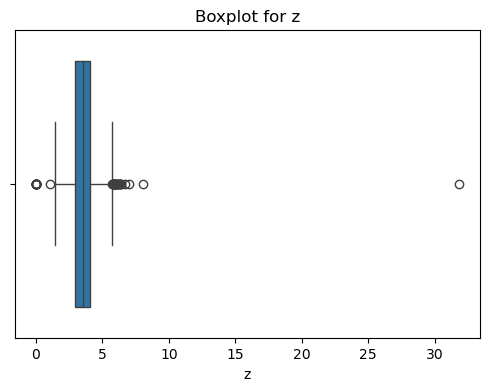

In [80]:
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

In [81]:
def handle_outliers_clip(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)    
    return df

data_no_outliers_clip = handle_outliers_clip(data)
print(data_no_outliers_clip.head())

   carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23  2.0      1        3  61.50   55.0  326.0  3.95  3.98  2.43
1   0.21  3.0      1        2  59.80   61.0  326.0  3.89  3.84  2.31
2   0.23  1.0      1        4  58.75   63.5  327.0  4.05  4.07  2.31
3   0.29  3.0      5        5  62.40   58.0  334.0  4.20  4.23  2.63
4   0.31  1.0      6        3  63.30   58.0  335.0  4.34  4.35  2.75


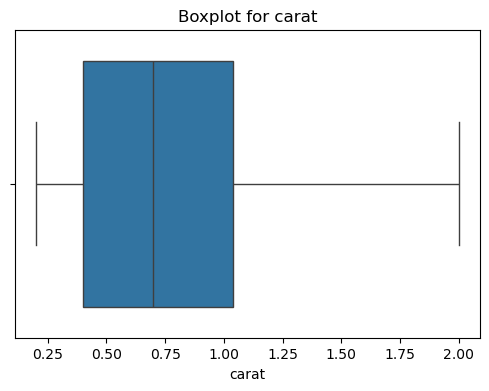

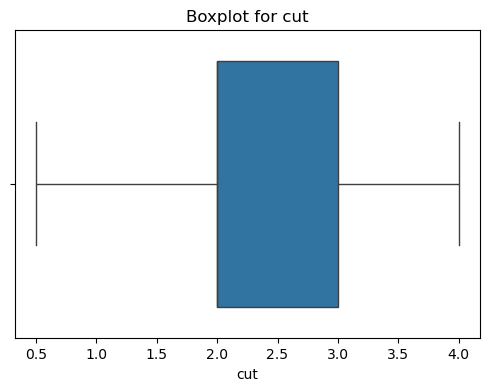

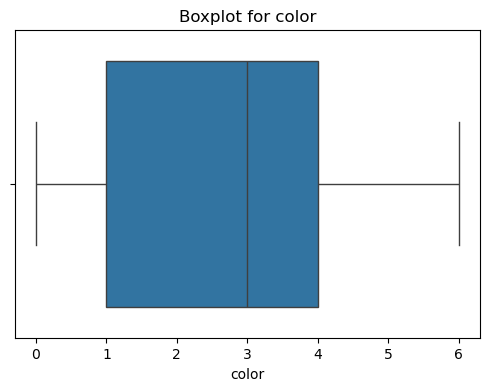

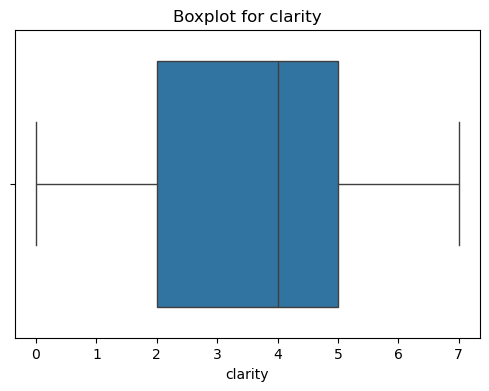

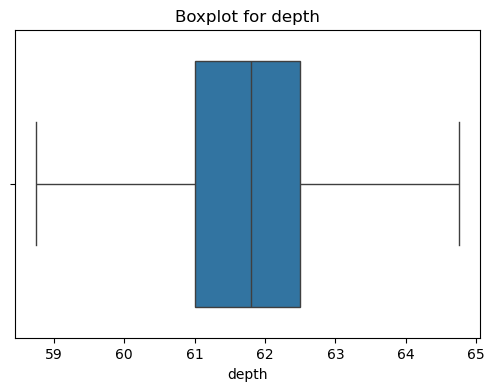

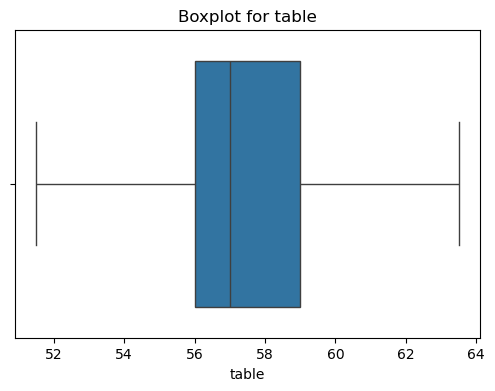

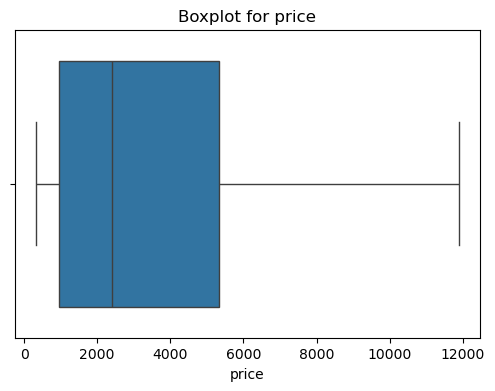

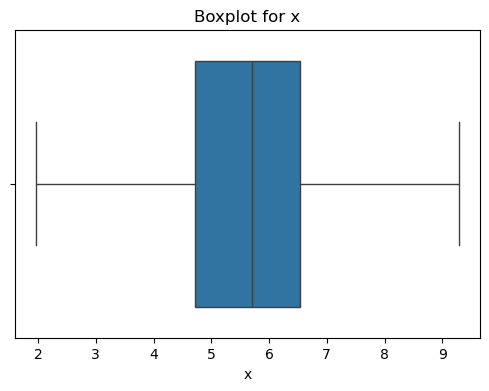

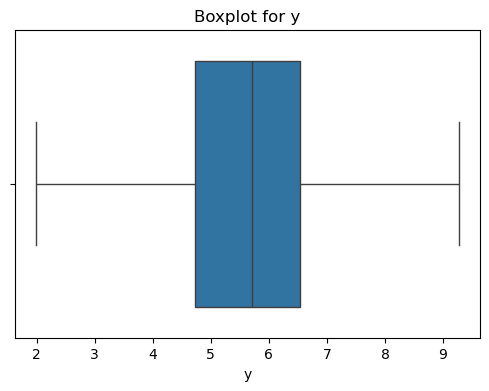

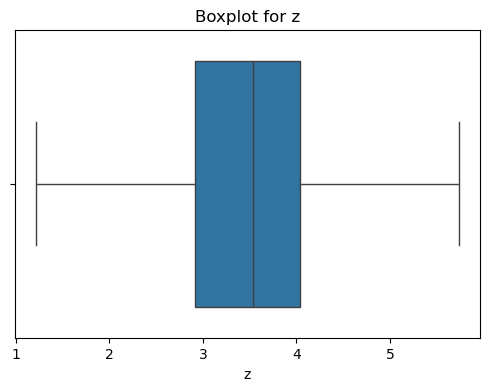

In [82]:
# checking if outliers still exist
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

### Splitting dataset

In [84]:
X = data.drop(columns=["price"])
y = data["price"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Modeling

In [87]:
regressors = {
    'Random Forest Regressor': RandomForestRegressor(n_estimators=47, random_state=34),
    'Linear Regression': LinearRegression(),
    'Support Vector Regressor (SVR)': SVR(kernel='linear'),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42, max_depth=5),
    'AdaBoost Regressor': AdaBoostRegressor(n_estimators=50, random_state=42, learning_rate=0.3)
}

# Train and evaluate each regressor
for name, reg in regressors.items():
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}:')
    print(f'  Mean Squared Error: {mse:.2f}')
    print(f'  R^2 Score: {r2:.2f}')
    print('-' * 50)

Random Forest Regressor:
  Mean Squared Error: 137773.67
  R^2 Score: 0.99
--------------------------------------------------
Linear Regression:
  Mean Squared Error: 1031084.46
  R^2 Score: 0.91
--------------------------------------------------
Support Vector Regressor (SVR):
  Mean Squared Error: 1190092.86
  R^2 Score: 0.90
--------------------------------------------------
KNN Regressor:
  Mean Squared Error: 341785.51
  R^2 Score: 0.97
--------------------------------------------------
Decision Tree Regressor:
  Mean Squared Error: 657370.28
  R^2 Score: 0.94
--------------------------------------------------
AdaBoost Regressor:
  Mean Squared Error: 1002931.00
  R^2 Score: 0.91
--------------------------------------------------


In [ ]:
#END